In [319]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [320]:
df = pd.read_csv("../python/csv_files/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


<AxesSubplot: xlabel='bought_insurance', ylabel='age'>

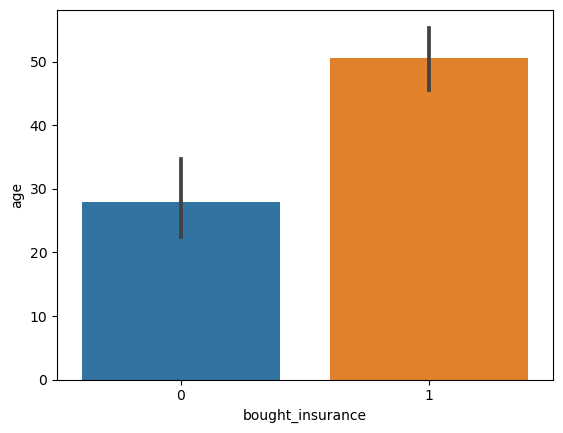

In [321]:
sns.barplot(x=df.bought_insurance, y=df.age)

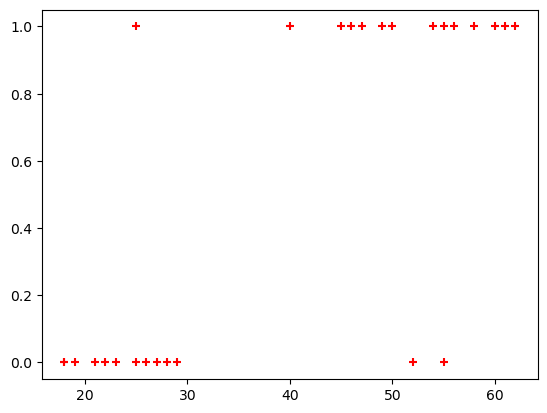

In [322]:
plt.scatter(x=df.age, y=df.bought_insurance, color="red", marker="+")

In [323]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df['bought_insurance'], test_size=0.1)
X_test

,age
22,40
4,46
0,22


In [324]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [325]:
model.predict(X_test)

array([0, 1, 0])

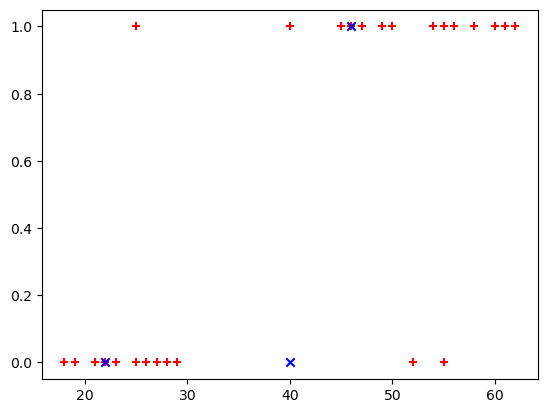

In [326]:
plt.scatter(x=df.age, y=df.bought_insurance, color="red", marker="+")
plt.scatter(x=X_test, y=model.predict(X_test), color="blue", marker="x")

In [327]:
model.score(X_test, y_test)

0.6666666666666666

# Exercise
## Using an employee retention dataset
### 1) Figure out which variables have more impact on employee retetion
### 2) Plot bar charts showing impact of employee salaries on employee retention
### 3) Plot bar charts showing corelation between department and employee retention
### 4) Build a logistic regression model and check the accuracy

In [328]:
data = pd.read_csv("../python/csv_files/HR_comma_sep.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


[]

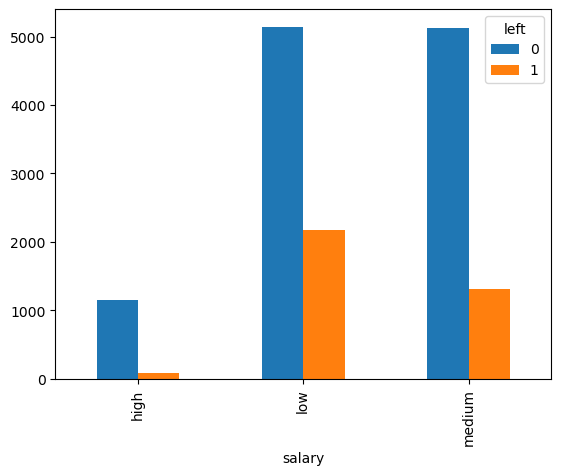

In [329]:
pd.crosstab(data.salary, data.left).plot(kind="bar").plot(kind="bar")

[]

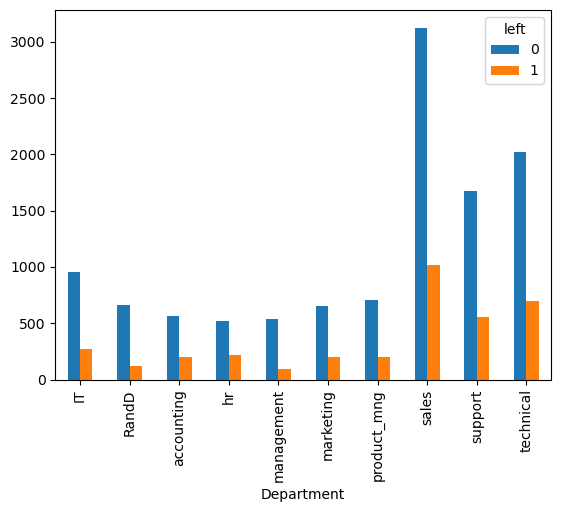

In [330]:
pd.crosstab(data.Department, data.left).plot(kind="bar").plot(kind="bar")

<AxesSubplot: xlabel='Department', ylabel='left'>

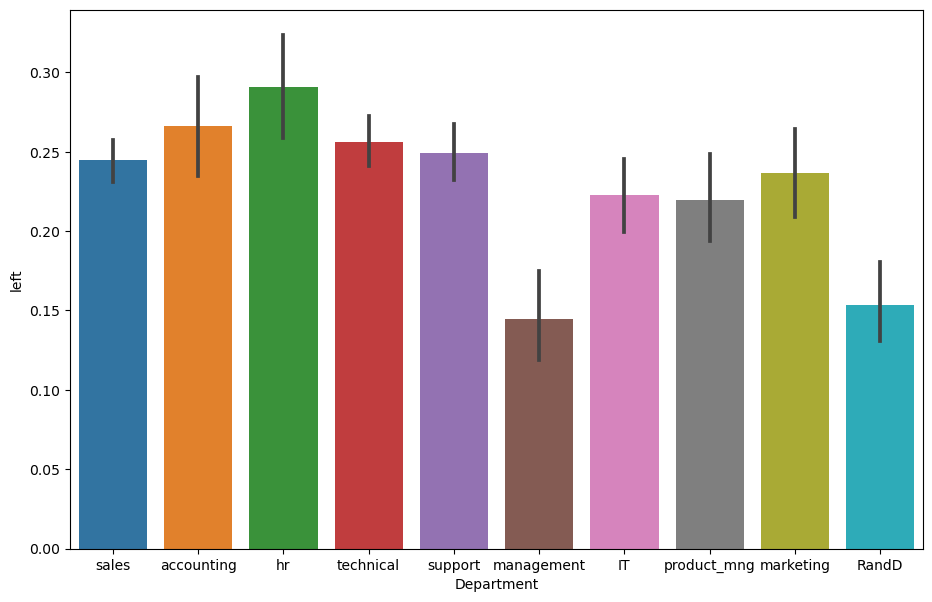

In [331]:
plt.figure(figsize=(11, 7))
sns.barplot(y=data.left, x=data.Department)

In [332]:
dept_dummies = pd.get_dummies(data.Department, drop_first=True)
dept_dummies

,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,1,0


In [333]:
salary_dummies = pd.get_dummies(data.salary, drop_first=True)
salary_dummies
data = pd.concat([data, dept_dummies, salary_dummies], axis=1)
data.drop(['Department', 'salary', 'last_evaluation', 'number_project', 'time_spend_company'], axis=1, inplace=True)
data.average_montly_hours = data.average_montly_hours / data.average_montly_hours.max()
data

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.506452,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.845161,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.877419,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.719355,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.512903,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.487097,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.516129,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.461290,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.903226,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [334]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['left'], axis=1), data.left, test_size=0.1)

In [335]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)

0.786